In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
years = list(range(2, 11))
transition_matrices = []
for i in years:
    filename = f"outputs/transition_matrix_year_{i-1}_to_{i}.xlsx"
    df = pd.read_excel(filename, index_col=0)
    transition_matrices.append(df)

transition_matrices

[          AAA        AA         A       BBB        BB         B         C  \
 AAA  0.146825  0.119048  0.115079  0.134921  0.111111  0.103175  0.134921   
 AA   0.128514  0.124498  0.136546  0.148594  0.116466  0.104418  0.144578   
 A    0.084615  0.115385  0.134615  0.130769  0.119231  0.169231  0.092308   
 BBB  0.103586  0.107570  0.111554  0.135458  0.135458  0.143426  0.131474   
 BB   0.127119  0.161017  0.114407  0.127119  0.093220  0.122881  0.122881   
 B    0.132576  0.106061  0.079545  0.140152  0.109848  0.113636  0.151515   
 C    0.112000  0.116000  0.140000  0.148000  0.104000  0.116000  0.156000   
 D    0.105042  0.142857  0.134454  0.121849  0.130252  0.105042  0.105042   
 
             D  
 AAA  0.134921  
 AA   0.096386  
 A    0.153846  
 BBB  0.131474  
 BB   0.131356  
 B    0.166667  
 C    0.108000  
 D    0.155462  ,
           AAA        AA         A       BBB        BB         B         C  \
 AAA  0.157447  0.110638  0.127660  0.127660  0.127660  0.119149

In [3]:
probs_default = [(matrix['D']) for matrix in transition_matrices]
probs_default

[AAA    0.134921
 AA     0.096386
 A      0.153846
 BBB    0.131474
 BB     0.131356
 B      0.166667
 C      0.108000
 D      0.155462
 Name: D, dtype: float64,
 AAA    0.097872
 AA     0.109312
 A      0.132780
 BBB    0.139706
 BB     0.108696
 B      0.142857
 C      0.126923
 D      0.114815
 Name: D, dtype: float64,
 AAA    0.068702
 AA     0.130252
 A      0.154150
 BBB    0.111111
 BB     0.155378
 B      0.061776
 C      0.124000
 D      0.135246
 Name: D, dtype: float64,
 AAA    0.175000
 AA     0.108434
 A      0.068273
 BBB    0.138462
 BB     0.133588
 B      0.145923
 C      0.109890
 D      0.123932
 Name: D, dtype: float64,
 AAA    0.151852
 AA     0.139785
 A      0.146919
 BBB    0.117647
 BB     0.118577
 B      0.103846
 C      0.133891
 D      0.128000
 Name: D, dtype: float64,
 AAA    0.113445
 AA     0.156118
 A      0.100418
 BBB    0.113360
 BB     0.146067
 B      0.120755
 C      0.101215
 D      0.134615
 Name: D, dtype: float64,
 AAA    0.113043
 AA     0.1

In [4]:
prob_default_df = pd.DataFrame()
borrowers = pd.read_excel("data/ratings_data.xlsx", index_col=0)

for year in range(2, 11):
    for borrower in borrowers.index:
        rating = borrowers.loc[borrower, f'Year {year}']
        prob_default = probs_default[year-2].loc[rating]
        prob_default_df.loc[borrower, f'Year {year}'] = prob_default

In [5]:
prob_default_df

,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
1,0.131356,0.142857,0.068702,0.109890,0.117647,0.113445,0.113725,0.106195,0.123404
2,0.096386,0.109312,0.135246,0.108434,0.117647,0.156118,0.119342,0.131783,0.097378
3,0.134921,0.097872,0.154150,0.175000,0.128000,0.120755,0.119342,0.111538,0.157447
4,0.108000,0.126923,0.068702,0.145923,0.151852,0.134615,0.113725,0.113821,0.122137
5,0.096386,0.097872,0.154150,0.138462,0.128000,0.113360,0.119342,0.106195,0.157447
...,...,...,...,...,...,...,...,...,...
1996,0.096386,0.114815,0.111111,0.108434,0.146919,0.146067,0.093284,0.131274,0.123404
1997,0.155462,0.139706,0.154150,0.175000,0.139785,0.134615,0.121771,0.131274,0.097378
1998,0.108000,0.108696,0.155378,0.145923,0.128000,0.146067,0.108696,0.106195,0.122137
1999,0.108000,0.126923,0.130252,0.145923,0.118577,0.113445,0.108696,0.116667,0.116667


In [6]:
prob_default_df.to_excel("outputs/probability_of_default_year_2_to_10.xlsx", index_label="Rating")

In [7]:
lgd_df = pd.read_excel("data/lgd_data.xlsx", index_col=0)
ead_df = pd.read_excel("data/ead_data.xlsx", index_col=0)
amt_df = pd.read_excel("data/amt_data.xlsx", index_col=0)

expected_loss_df = pd.DataFrame()

for year in range(2, 11):
    expected_loss_df[f'Year {year}'] = (prob_default_df[f'Year {year}'] *
                                        lgd_df[f'Year {year}'] *
                                        ead_df[f'Year {year}'] *
                                        amt_df[f'Year {year}'])

In [8]:
expected_loss_df

,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
1,2.485274,2.400177,1.722191,0.831176,3.424952,0.993722,1.161733,0.295978,1.848730
2,0.545544,1.619311,1.057141,0.213106,2.294608,0.524811,0.715695,1.040184,1.225893
3,2.007964,1.528838,2.402573,0.231431,2.181874,2.476175,1.401933,1.741095,1.343986
4,0.502207,2.547194,1.756655,1.278742,2.361813,0.958974,0.854580,1.047591,0.672798
5,0.423290,0.254500,3.057241,5.994829,0.100942,0.347155,1.986207,1.211375,0.594686
...,...,...,...,...,...,...,...,...,...
1996,1.017720,1.500941,0.446549,0.447556,2.565885,0.918485,0.847976,1.873471,0.301581
1997,0.857264,1.960829,3.659099,5.006223,2.560044,0.608157,0.688161,0.350526,0.220250
1998,2.449002,1.258932,0.891673,0.779496,0.435276,1.147600,3.183947,0.402752,1.610369
1999,0.102470,0.516315,0.638548,0.483116,0.477864,1.119354,2.062744,2.799734,1.583563


In [9]:
expected_loss_df.to_excel("outputs/expected_loss_year_2_to_10.xlsx", index_label="Rating")

## STRESS TESTING
(i) Cap LGD at 1.0

In [10]:
stress_test_lgd = [1.36, 1.33, 1.26, 1.49, 1.24, 1.26, 1.41, 1.28, 1.23, 1.21]

stress_test_expected_loss_df = pd.DataFrame()
amt_df_stress = amt_df.copy()

new_lost_amt_df = pd.DataFrame()

for year in range(2, 11):
    new_lost_amt_df[f'Year {year}'] = amt_df[f'Year {year}'] * lgd_df[f'Year {year}'] * stress_test_lgd[year-1]

for year in range(2, 11):
    for borrower in borrowers.index:
        if new_lost_amt_df.loc[borrower, f'Year {year}'] > amt_df.loc[borrower, f'Year {year}']:
            new_lost_amt_df.loc[borrower, f'Year {year}'] = amt_df.loc[borrower, f'Year {year}']
        else:
            continue

for year in range(2, 11):
    stress_test_expected_loss_df[f'Year {year}'] = (prob_default_df[f'Year {year}'] *
                                        ead_df[f'Year {year}'] *
                                        new_lost_amt_df[f'Year {year}'])
stress_test_expected_loss_df

,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
1,3.305414,3.024222,2.262514,1.030659,4.315440,1.401148,1.487019,0.364053,2.236964
2,0.725574,2.040332,1.575140,0.264251,2.800668,0.739983,0.916089,1.279427,1.483330
3,2.670592,1.926336,3.090564,0.286974,2.749161,3.060351,1.610298,2.141547,1.623735
4,0.667935,3.209464,2.087481,1.585640,2.975885,1.352153,1.093862,1.288537,0.814086
5,0.562975,0.320669,4.555289,6.725978,0.127187,0.489488,2.542346,1.489992,0.719570
...,...,...,...,...,...,...,...,...,...
1996,1.268570,1.891186,0.665358,0.554969,3.233015,1.295063,1.068627,2.225010,0.364913
1997,1.140161,2.470644,4.778902,6.207716,3.225656,0.857501,0.880846,0.431147,0.266503
1998,3.257173,1.586254,1.062753,0.966576,0.548448,1.618116,4.075452,0.495385,1.948546
1999,0.136285,0.650556,0.951436,0.599064,0.602109,1.578289,2.339718,3.140928,1.916111


In [11]:
stress_test_expected_loss_df.to_excel("outputs/stress_test_expected_loss_year_2_to_10.xlsx", index_label="Rating")

(ii) rating drop y9-y10

In [12]:
rating_drops = ["A", "BB", "BBB", "C", "B", "D", "D", "D"]
ratings_list = transition_matrices[0].index.tolist()
rating_drop_dict = {}
for i in range(len(rating_drops)):
    rating_drop_dict[ratings_list[i]] = rating_drops[i]
rating_drop_dict

{'AAA': 'A',
 'AA': 'BB',
 'A': 'BBB',
 'BBB': 'C',
 'BB': 'B',
 'B': 'D',
 'C': 'D',
 'D': 'D'}

In [13]:
stress_test_ratings_df = borrowers.copy()
for borrower in borrowers.index:
    stress_test_ratings_df.loc[borrower, 'Year 10'] = rating_drop_dict[borrowers.loc[borrower, 'Year 9']]
stress_test_ratings_df

,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Borrower Number,,,,,,,,,,
1,B,BB,B,AAA,C,BBB,AAA,B,D,D
2,BBB,AA,AA,D,AA,BBB,AA,A,C,D
3,D,AAA,AAA,A,AAA,D,B,A,AA,BB
4,AAA,C,C,AAA,B,AAA,D,B,BB,B
5,BBB,AA,AAA,A,BBB,D,BBB,A,D,D
...,...,...,...,...,...,...,...,...,...,...
1996,BB,AA,D,BBB,AA,A,BB,BBB,AAA,A
1997,B,D,BBB,A,AAA,AA,D,BB,AAA,A
1998,BB,C,BB,BB,B,D,BB,AA,D,D


In [14]:
stress_test_2_prob_default_df= pd.DataFrame()

for year in range(2, 11):
    for borrower in borrowers.index:
        rating = stress_test_ratings_df.loc[borrower, f'Year {year}']
        prob_default = probs_default[year-2].loc[rating]
        stress_test_2_prob_default_df.loc[borrower, f'Year {year}'] = prob_default
stress_test_2_prob_default_df


,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
1,0.131356,0.142857,0.068702,0.109890,0.117647,0.113445,0.113725,0.106195,0.157447
2,0.096386,0.109312,0.135246,0.108434,0.117647,0.156118,0.119342,0.131783,0.157447
3,0.134921,0.097872,0.154150,0.175000,0.128000,0.120755,0.119342,0.111538,0.116667
4,0.108000,0.126923,0.068702,0.145923,0.151852,0.134615,0.113725,0.113821,0.097378
5,0.096386,0.097872,0.154150,0.138462,0.128000,0.113360,0.119342,0.106195,0.157447
...,...,...,...,...,...,...,...,...,...
1996,0.096386,0.114815,0.111111,0.108434,0.146919,0.146067,0.093284,0.131274,0.123457
1997,0.155462,0.139706,0.154150,0.175000,0.139785,0.134615,0.121771,0.131274,0.123457
1998,0.108000,0.108696,0.155378,0.145923,0.128000,0.146067,0.108696,0.106195,0.157447
1999,0.108000,0.126923,0.130252,0.145923,0.118577,0.113445,0.108696,0.116667,0.157447


In [15]:
stress_test_2_expected_loss_df = pd.DataFrame()

for year in range(2, 11):
    stress_test_2_expected_loss_df[f'Year {year}'] = (
                                        stress_test_2_prob_default_df[f'Year {year}'] *
                                        lgd_df[f'Year {year}'] *
                                        ead_df[f'Year {year}'] *
                                        amt_df[f'Year {year}'])
stress_test_2_expected_loss_df

,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
1,2.485274,2.400177,1.722191,0.831176,3.424952,0.993722,1.161733,0.295978,2.358725
2,0.545544,1.619311,1.057141,0.213106,2.294608,0.524811,0.715695,1.040184,1.982094
3,2.007964,1.528838,2.402573,0.231431,2.181874,2.476175,1.401933,1.741095,0.995881
4,0.502207,2.547194,1.756655,1.278742,2.361813,0.958974,0.854580,1.047591,0.536412
5,0.423290,0.254500,3.057241,5.994829,0.100942,0.347155,1.986207,1.211375,0.594686
...,...,...,...,...,...,...,...,...,...
1996,1.017720,1.500941,0.446549,0.447556,2.565885,0.918485,0.847976,1.873471,0.301710
1997,0.857264,1.960829,3.659099,5.006223,2.560044,0.608157,0.688161,0.350526,0.279234
1998,2.449002,1.258932,0.891673,0.779496,0.435276,1.147600,3.183947,0.402752,2.075920
1999,0.102470,0.516315,0.638548,0.483116,0.477864,1.119354,2.062744,2.799734,2.137088


In [16]:
stress_test_2_expected_loss_df.to_excel("outputs/stress_test_2_expected_loss_year_2_to_10.xlsx", index_label="Rating")

In [17]:
print("Year 10 EL: ", sum(expected_loss_df[['Year 10']].sum()),
      "\nYear 10 EL (Stress test 1): ", sum(stress_test_expected_loss_df[['Year 10']].sum()),
      "\nYear 10 EL (Stress test 2): ",sum(stress_test_2_expected_loss_df[['Year 10']].sum()))

Year 10 EL:  2898.729532379717 
Year 10 EL (Stress test 1):  3482.116918244594 
Year 10 EL (Stress test 2):  2976.8521932109597


In [18]:
el_scenarios_df = pd.DataFrame(columns=['Year', 'Base Case EL', 'Stress Test 1 EL', 'Stress Test 2 EL'])

for year in range(2, 11):
    el_scenarios_df.loc[year, 'Year'] = year
    el_scenarios_df.loc[year, 'Base Case EL'] = sum(expected_loss_df[[f'Year {year}']].sum())
    el_scenarios_df.loc[year, 'Stress Test 1 EL'] = sum(stress_test_expected_loss_df[[f'Year {year}']].sum())
    el_scenarios_df.loc[year, 'Stress Test 2 EL'] = sum(stress_test_2_expected_loss_df[[f'Year {year}']].sum())
    print(f"Year {year} EL: ", sum(expected_loss_df[[f'Year {year}']].sum()),
      f"\nYear {year} EL (Stress test 1): ", sum(stress_test_expected_loss_df[[f'Year {year}']].sum()),
      f"\nYear {year} EL (Stress test 2): ",sum(stress_test_2_expected_loss_df[[f'Year {year}']].sum()))

Year 2 EL:  3131.557697043848 
Year 2 EL (Stress test 1):  4050.698682569628 
Year 2 EL (Stress test 2):  3131.557697043848
Year 3 EL:  2817.3360248996837 
Year 3 EL (Stress test 1):  3497.675043115332 
Year 3 EL (Stress test 2):  2817.3360248996837
Year 4 EL:  2650.420431331857 
Year 4 EL (Stress test 1):  3695.0492378954277 
Year 4 EL (Stress test 2):  2650.420431331857
Year 5 EL:  2891.716216308031 
Year 5 EL (Stress test 1):  3550.023006530744 
Year 5 EL (Stress test 2):  2891.716216308031
Year 6 EL:  2910.980865521482 
Year 6 EL (Stress test 1):  3623.5176261294127 
Year 6 EL (Stress test 2):  2910.980865521482
Year 7 EL:  2887.5116982403756 
Year 7 EL (Stress test 1):  3883.3190196609276 
Year 7 EL (Stress test 2):  2887.5116982403756
Year 8 EL:  2614.057472571863 
Year 8 EL (Stress test 1):  3286.212035382131 
Year 8 EL (Stress test 2):  2614.057472571863
Year 9 EL:  2665.7141742161994 
Year 9 EL (Stress test 1):  3244.9926198201174 
Year 9 EL (Stress test 2):  2665.714174216199

In [19]:
pd_category_years_df = pd.DataFrame()
for year in range(2, 11):
    pd_category_years_df[f'Year {year}'] = probs_default[year-2]
pd_category_years_df.to_excel("outputs/pd_per_category_per_year.xlsx", index='Rating')
pd_category_years_df

,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
AAA,0.134921,0.097872,0.068702,0.175000,0.151852,0.113445,0.113043,0.131274,0.152344
AA,0.096386,0.109312,0.130252,0.108434,0.139785,0.156118,0.108696,0.111538,0.137405
A,0.153846,0.132780,0.154150,0.068273,0.146919,0.100418,0.119342,0.104478,0.123457
BBB,0.131474,0.139706,0.111111,0.138462,0.117647,0.113360,0.093284,0.123457,0.123404
BB,0.131356,0.108696,0.155378,0.133588,0.118577,0.146067,0.121771,0.113821,0.116667
B,0.166667,0.142857,0.061776,0.145923,0.103846,0.120755,0.113725,0.116667,0.097378
C,0.108000,0.126923,0.124000,0.109890,0.133891,0.101215,0.113281,0.131783,0.122137
D,0.155462,0.114815,0.135246,0.123932,0.128000,0.134615,0.121457,0.106195,0.157447


In [20]:
el_scenarios_df.to_excel("outputs/expected_loss_scenarios_summary.xlsx", index=False)

In [21]:
el_scenarios_df

,Year,Base Case EL,Stress Test 1 EL,Stress Test 2 EL
2,2,3131.557697,4050.698683,3131.557697
3,3,2817.336025,3497.675043,2817.336025
4,4,2650.420431,3695.049238,2650.420431
5,5,2891.716216,3550.023007,2891.716216
6,6,2910.980866,3623.517626,2910.980866
7,7,2887.511698,3883.31902,2887.511698
8,8,2614.057473,3286.212035,2614.057473
9,9,2665.714174,3244.99262,2665.714174
10,10,2898.729532,3482.116918,2976.852193


Text(0, 0.5, 'Expected Loss (in Rs Crore)')

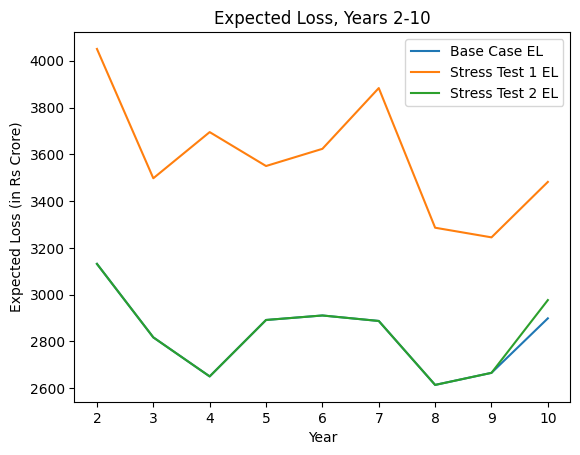

In [22]:
plt.figure()
plt.plot(el_scenarios_df['Year'], el_scenarios_df['Base Case EL'], label='Base Case EL')
plt.plot(el_scenarios_df['Year'], el_scenarios_df['Stress Test 1 EL'], label='Stress Test 1 EL')
plt.plot(el_scenarios_df['Year'], el_scenarios_df['Stress Test 2 EL'], label = 'Stress Test 2 EL')
plt.legend()
plt.title("Expected Loss, Years 2-10")
plt.xlabel("Year")
plt.ylabel("Expected Loss (in Rs Crore)")